In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mymath
from scipy import stats

In [2]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/titanic_dataset.csv"
data= pd.read_csv(file) #reading file

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# passenger id as index column
data.set_index('PassengerId', inplace=True)

In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# check for missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

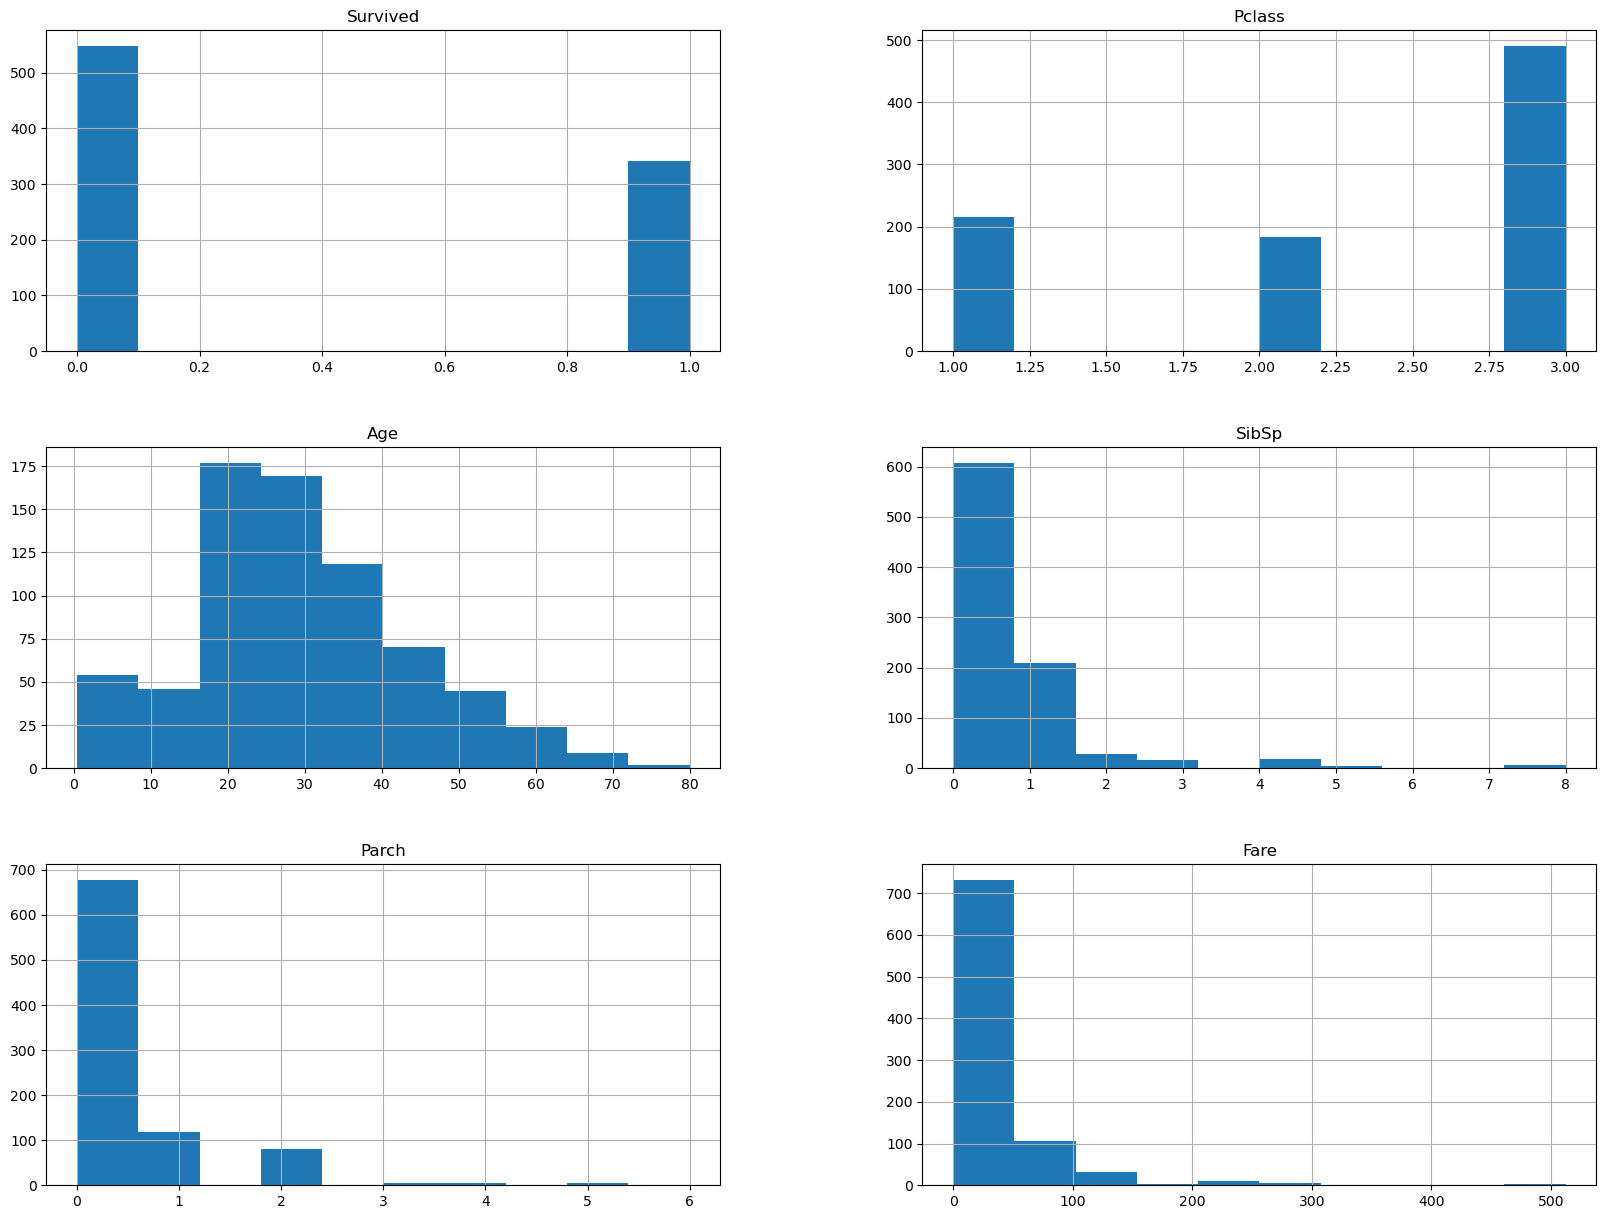

In [11]:
data.hist(figsize=(20,15))
plt.show()


In [12]:
# replacing missing values using median
for i in ['Age']:
    data[i]= data[i].fillna(data[i].median())

In [13]:
for i in ['Cabin','Embarked']:
    data[i]= data[i].fillna(data[i].mode()[0])

In [14]:
# check for missing values
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<Axes: >

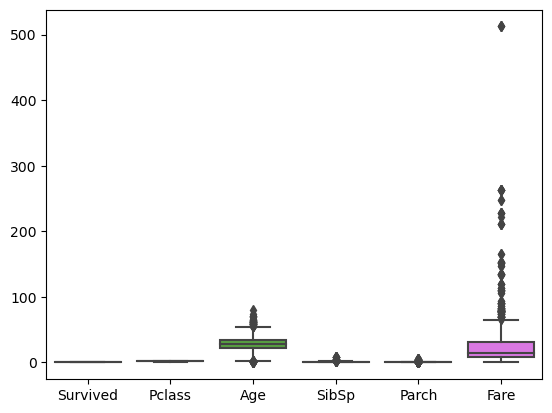

In [15]:
#  boxplot of titanic dataset
sns.boxplot( palette="husl", data=data)

In [16]:
box=data.select_dtypes(include=['float','int'])
box.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

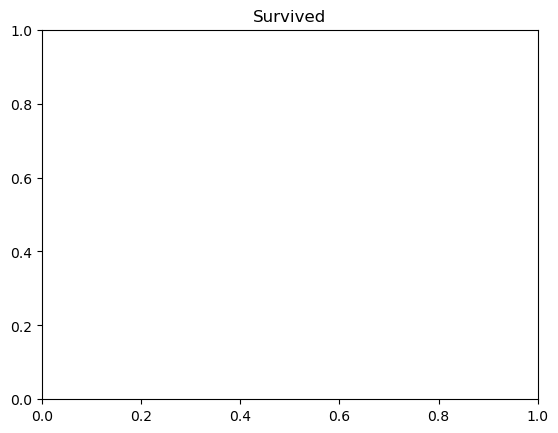

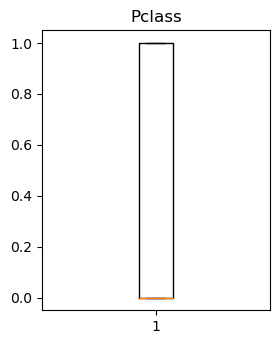

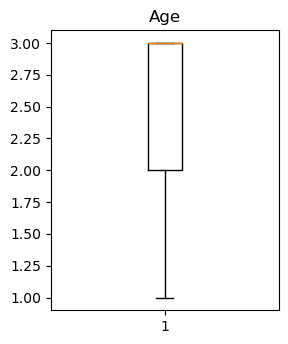

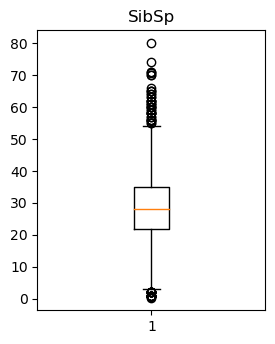

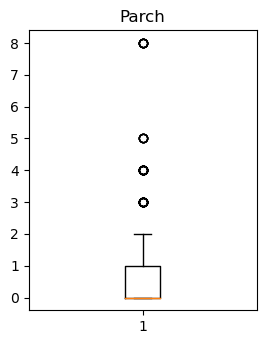

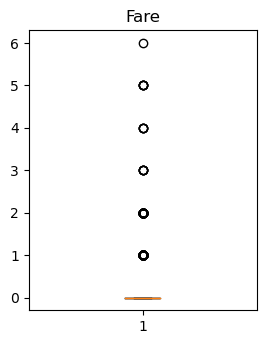

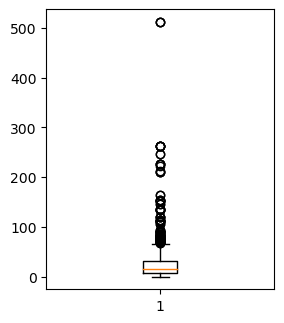

In [17]:
j=1
for i in ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    plt.title(i)
    plt.figure(figsize=(10,8))
    plt.subplot(2,3,j)
    plt.boxplot(box[i])
    j=j+1
plt.show()

In [18]:
# removing outliers
for i in ['SibSp', 'Parch', 'Fare']:
    Q1= np.percentile(data[i],25, interpolation='midpoint')
    Q2= np.percentile(data[i],50, interpolation='midpoint')
    Q3= np.percentile(data[i],75, interpolation='midpoint')
    if Q2== data[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in data[i]:
            if(x<low_lim)or (x>up_lim):
                outlier.append(x)
        ind2= data[i]>up_lim
        ind3= data[i]<low_lim
        indicestodrop2= data.loc[ind2].index
        indicestodrop3= data.loc[ind3].index
        data= data.drop(indicestodrop2)
        data= data.drop(indicestodrop3)
    else:
        print('check again')
data.shape


C:\Users\ppbin\AppData\Local\Temp\ipykernel_3604\3121906927.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1= np.percentile(data[i],25, interpolation='midpoint')
C:\Users\ppbin\AppData\Local\Temp\ipykernel_3604\3121906927.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2= np.percentile(data[i],50, interpolation='midpoint')
C:\Users\ppbin\AppData\Local\Temp\ipykernel_3604\3121906927.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpo

(591, 11)

In [19]:
# one hot encoding
data2= pd.get_dummies(data)

In [20]:
data2.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbing, Mr. Anthony', 'Name_Abelson, Mr. Samuel',
       'Name_Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Name_Adahl, Mr. Mauritz Nils Martin',
       ...
       'Cabin_E77', 'Cabin_E8', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F33',
       'Cabin_F38', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1219)

In [21]:
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin",...,Cabin_E77,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F33,Cabin_F38,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,3,28.0,0,0,8.4583,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
#now drop and create dummies
data2= data.drop(['Name','Ticket','Cabin'], axis=1)

In [26]:
data2= pd.get_dummies(data2)

In [27]:
#after encoded data fit  logistic regression
y = data2['Survived']
X = data2.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
#R square should be close to 1, mse should be minimum
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

C:\Users\ppbin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[91, 16],
       [15, 26]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, f1_score,  accuracy_score

In [29]:
print(precision_score(y_test,y_pred))

0.6190476190476191


In [30]:
print(f1_score(y_test,y_pred))
#print(recal(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6265060240963854
0.7905405405405406


In [31]:
#kNN classification
from sklearn.neighbors import KNeighborsClassifier

In [32]:
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

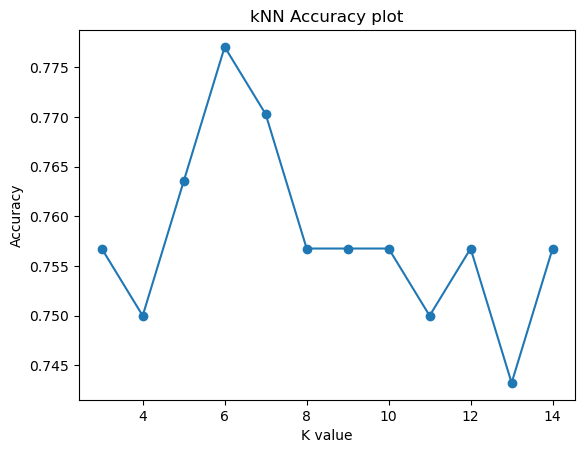

In [33]:
plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [34]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.777027027027027

In [36]:
confusion_matrix(y_test,y_pred)

array([[103,   4],
       [ 29,  12]], dtype=int64)

In [43]:
#now scale the data and see if it's the same values
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,591.000000,591.000000,591.000000,591.0,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,2.478849,30.854484,0.181049,0.0,14.096932,0.241963,0.758037,0.137056,0.113367,0.749577
std,0.745024,11.091567,0.431057,0.0,10.722304,0.428635,0.428635,0.344198,0.317310,0.433624
min,1.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.750000,0.000000,0.0,7.775000,0.000000,1.000000,0.000000,0.000000,0.500000
50%,3.000000,28.000000,0.000000,0.0,8.662500,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,34.000000,0.000000,0.0,15.800000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,2.000000,0.0,53.100000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      591 non-null    int64  
 1   Age         591 non-null    float64
 2   SibSp       591 non-null    int64  
 3   Parch       591 non-null    int64  
 4   Fare        591 non-null    float64
 5   Sex_female  591 non-null    uint8  
 6   Sex_male    591 non-null    uint8  
 7   Embarked_C  591 non-null    uint8  
 8   Embarked_Q  591 non-null    uint8  
 9   Embarked_S  591 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 30.6 KB


In [37]:
#take X1 as dropped X with no categorical data for scaling purposes
X1= X.drop(['Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S','Pclass', 'Parch','SibSp'], axis=1)

In [38]:
X1.isna().sum()

Age     0
Fare    0
dtype: int64

In [39]:
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler(feature_range=(0,1))

#min_max for minmaxscaling
X1 = min_max.fit_transform(X1)
X1 = pd.DataFrame(X1,columns=['Age', 'Fare'])
X.drop(['Age', 'Fare'],axis=1,inplace=True)
#using something cleaner, so it becomes alligned, both indices are reset
#then alligned
X = pd.concat([X.reset_index(drop=True), X1.reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
#R square should be close to 1, mse should be minimum
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[71, 12],
       [13, 23]], dtype=int64)

In [40]:
from sklearn.metrics import precision_score, f1_score,  accuracy_score

In [41]:
print(precision_score(y_test,y_pred))

0.6571428571428571


In [42]:
print(f1_score(y_test,y_pred))
#print(recal(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.647887323943662
0.7899159663865546


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

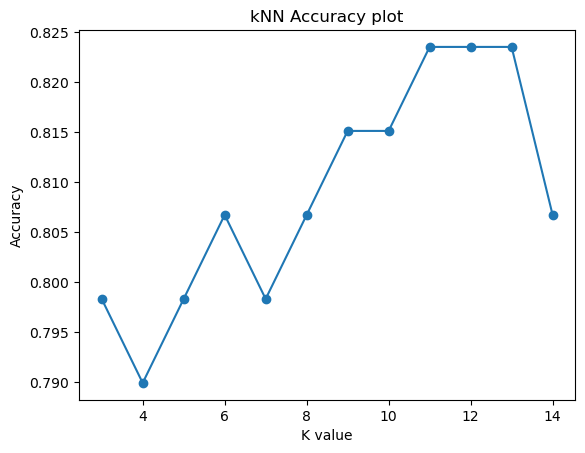

In [45]:
plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [46]:
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.8235294117647058

In [48]:
confusion_matrix(y_test,y_pred)

array([[76,  7],
       [14, 22]], dtype=int64)